In [4]:
# Facebook Prophet

from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error as rmse


In [5]:
df = pd.read_csv('AirPassengers.csv')
df = df.rename(columns={'Month': 'ds', 'Passengers': 'y'})
df.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df['y_orig'] = df['y']
df.head()

,ds,y,y_orig
0,1949-01,112,112
1,1949-02,118,118
2,1949-03,132,132
3,1949-04,129,129
4,1949-05,121,121


In [7]:
df['y'] = np.log(df['y'])
df.head()

,ds,y,y_orig
0,1949-01,4.718499,112
1,1949-02,4.770685,118
2,1949-03,4.882802,132
3,1949-04,4.859812,129
4,1949-05,4.795791,121


In [8]:
model = Prophet()
model.fit(df)

19:56:13 - cmdstanpy - INFO - Chain [1] start processing
19:56:16 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future_data = model.make_future_dataframe(periods=24, freq='ME')
forecast = model.predict(future_data)

In [10]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
163,1962-07-31,6.594548,6.518483,6.668729
164,1962-08-31,6.477791,6.397872,6.560644
165,1962-09-30,6.312231,6.233930,6.399485
166,1962-10-31,6.178952,6.095629,6.273277
167,1962-11-30,6.325171,6.231199,6.421573


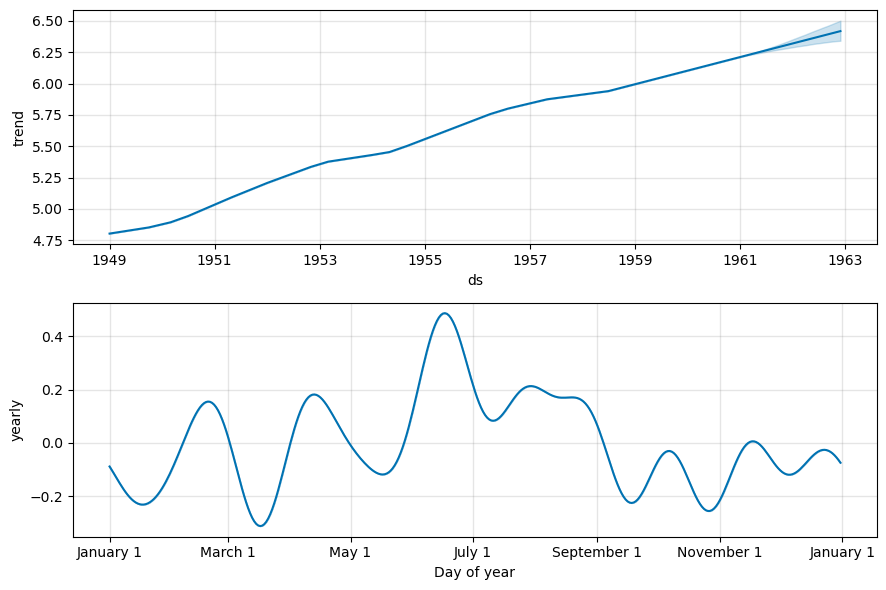

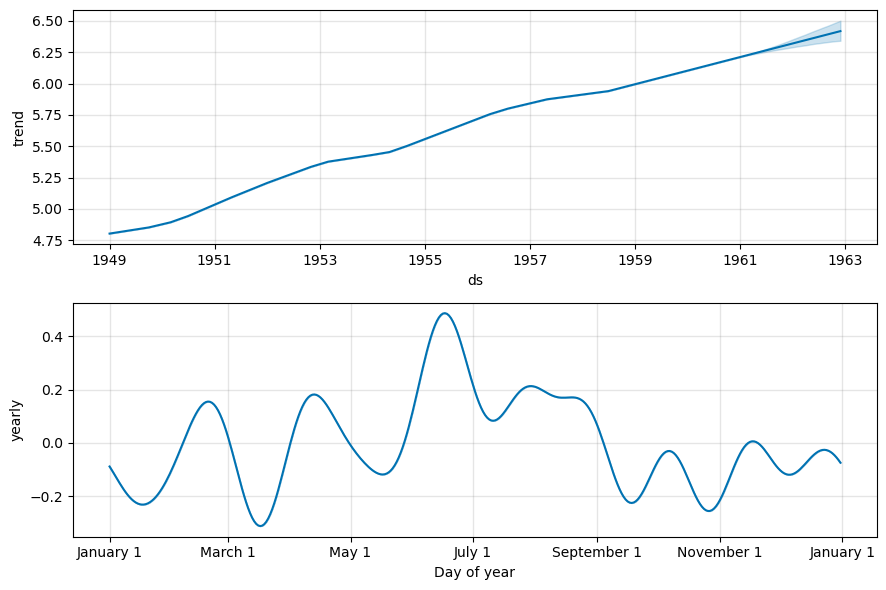

In [11]:
model.plot_components(forecast)

In [12]:
df['y'] = df['y_orig'].copy()
df.drop(['y_orig'], axis=1, inplace=True)
df['ds'] = forecast['ds']
df['yhat'] = round(np.exp(forecast['yhat']), 2)
df['yhat_lower'] = round(np.exp(forecast['yhat_lower']), 2)
df['yhat_upper'] = round(np.exp(forecast['yhat_upper']), 2)

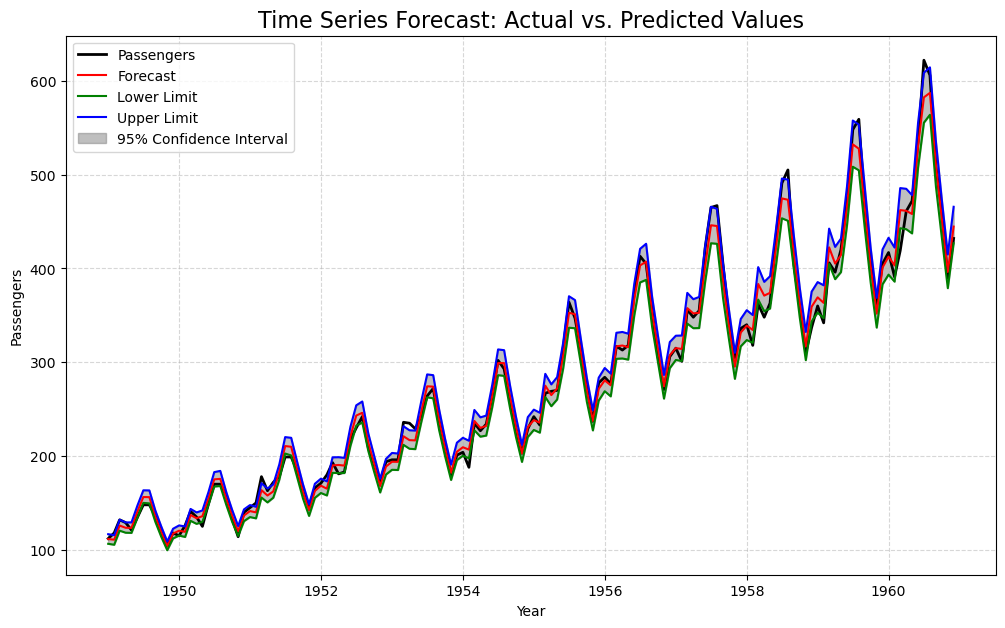

In [13]:
plt.figure(figsize=(12, 7))
plt.plot(df['ds'], df['y'], label='Passengers', color='black', linewidth=2)
plt.plot(df['ds'], df['yhat'], label='Forecast', color='red', linewidth=1.5)
plt.plot(df['ds'], df['yhat_lower'], label='Lower Limit', color='green', linewidth=1.5)
plt.plot(df['ds'], df['yhat_upper'], label='Upper Limit', color='blue', linewidth=1.5)
plt.fill_between(df['ds'], df['yhat_lower'], df['yhat_upper'], color='grey', alpha=0.5, label='95% Confidence Interval')    
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Time Series Forecast: Actual vs. Predicted Values', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [14]:
performance = round(rmse(df['y'], df['yhat']), 2)
error_rate = round((performance * 100)/len(df))
error_rate

7

In [15]:
new_df = df[['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper']]
new_df = new_df.rename(columns={'ds': 'Month', 'y': 'Actual_Passenger_Data', 'yhat': 'Predicted_Passenger_Data', 'yhat_lower': 'Lower_Limit', 'yhat_upper': 'Upper_Limit'})
new_df.to_csv('flight_usage_forecast.csv', index=False)